## Generate 50 2D-data points using the following function: y = sin(x^2 + 1)  

In [399]:
import numpy as np
import matplotlib.pyplot as plt

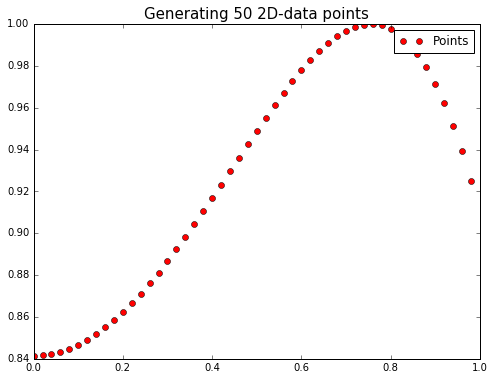

In [400]:
# Defining the function
def f(x):
    return (np.sin(x**2 + 1))

# Generating 50 data points
x = np.arange(0, 1, 0.02)
y = f(x)

#Setting up matplotlib
def setup_plot(title):
    %matplotlib inline
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=15)

# Plotting the data
def plot_data(x, y):
    setup_plot("Generating 50 2D-data points")
    plt.plot(x, y, "ro", label = "Points")
    plt.legend()
    plt.show()
    
plot_data(x, y)

## 2. Add Gaussian random noise to the data

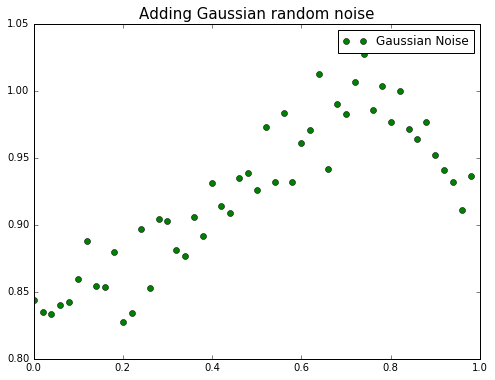

In [401]:
noise = np.random.normal(0, 0.02,50)
gauss_y = y + noise

# Plotting the data
def plot_data(x, y):
    setup_plot("Adding Gaussian random noise")
    plt.plot(x, y, "go", label = "Gaussian Noise")
    plt.legend()
    plt.show()
    
plot_data(x, gauss_y)

## 3. Show the original curve line and the noisy data.

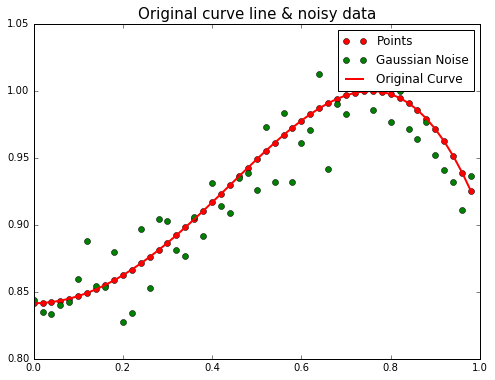

In [402]:
# Plotting the data
def plot_data(x, y, noisy):
    setup_plot("Original curve line & noisy data")
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, noisy, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    plt.legend()
    plt.show()
plot_data(x, y, gauss_y)

## 4. Compute w based on the full Bayesian inference (by using basis functions like discussed in class).

In [403]:
from numpy.linalg import pinv 

def basis_function(x, typ, M=5):
    N = len(x)
    phi = np.zeros([N, M])
    
    if (typ=="gaussian"):
        for n in range(0, N): 
            s = 0.25    # standard deviation
            u = 0       # mean
            for m in range(0, M):
                phi[n][m] = np.exp(-np.power(x[n] - u, 2)/(2*s*s))
                u += s
    
    return phi

def calculate_w(t, phi, M=5, alpha=0.01, beta=0.2):
    alpha_I = np.identity(M) * alpha
    
    beta_phi_t_phi = np.multiply(beta, (phi.transpose().dot(phi)))
    inverse = pinv(np.add(alpha_I, beta_phi_t_phi))
    
    w = np.multiply(beta, ((inverse.dot(phi.transpose()).dot(t))))
    return w

x = np.arange(0, 1, 0.02)
phi = basis_function(x, "gaussian", M=5)
w = calculate_w(gauss_y, phi, M=5)

## 5. Display the estimated values of w

In [404]:
print("w = %s" % w)

w = [ 0.61165559  0.18736998  0.4470743   0.343964    0.5838593 ]


## 6. Experiment with your code by changing alpha and beta. Try to understand the meaning of them with respect to the curve fitting results.

### alpha = 0.01, beta = 0.2

w = [ 0.61165559  0.18736998  0.4470743   0.343964    0.5838593 ]


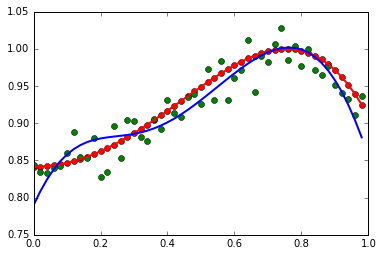

In [405]:
w = calculate_w(gauss_y, phi, M=5, alpha=0.01, beta = 0.2)
print("w = %s" % w)

# where f is the basis function
def calculate_y (x, w, M): 
    N = len(x)
    y = 0
    s = 0.25
    u = 0
    
    # for each coefficient        
    for m in range(0, M):
        y += w[m] * np.exp(-(np.square(x-u))/(2*s*s))
        u += s
        
    return y

y = f(x)
y_est = calculate_y(x, w, M=5)
#print("y_est = %s" % y_est)

def plot_full_bayesian(x, y, gauss_y, y_est):
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, gauss_y, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y, label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_est, label = "Estimated Curve")
    plt.setp(est_line, color='b', linewidth=2.0)

plot_full_bayesian(x, y, gauss_y, y_est)



### alpha = 0.01, beta = 0.01

w = [ 0.45057583  0.35892307  0.30234396  0.46956263  0.46167933]
A lower beta led to more imprecision


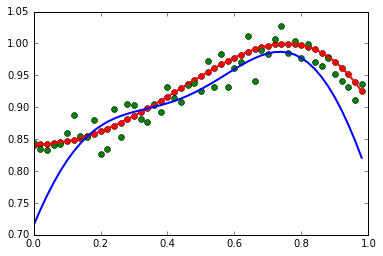

In [406]:
w = calculate_w(gauss_y, phi, M=5, alpha=0.01, beta = 0.01)
print("w = %s" % w)
y_est = calculate_y(x, w, M=5)

plot_full_bayesian(x, y, gauss_y, y_est)
print("A lower beta led to more imprecision")


### alpha = 0.1, beta = 0.2

w = [ 0.48908142  0.33985569  0.30364957  0.46796873  0.48602048]
A higher alpha led to more fluctuations in the y-values at the ends


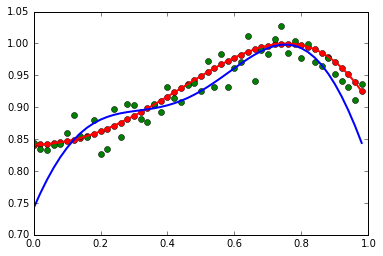

In [407]:
w = calculate_w(gauss_y, phi, M=5, alpha=0.1, beta = 0.2)
print("w = %s" % w)
y_est = calculate_y(x, w, M=5)

plot_full_bayesian(x, y, gauss_y, y_est)
print("A higher alpha led to more fluctuations in the y-values at the ends")

### alpha = 1e-4, beta = 0.2

w = [ 0.71907249  0.01339902  0.64247879  0.16804941  0.69574721]
A really low alpha led to more precise fitting


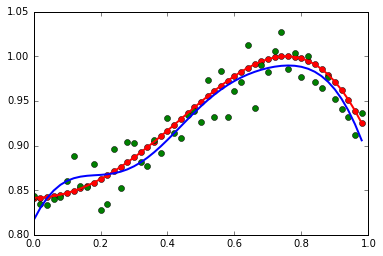

In [408]:
w = calculate_w(gauss_y, phi, M=5, alpha=0.0001, beta = 0.2)
print("w = %s" % w)
y_est = calculate_y(x, w, M=5)

plot_full_bayesian(x, y, gauss_y, y_est)
print("A really low alpha led to more precise fitting")

## 7. Show your best fitting:

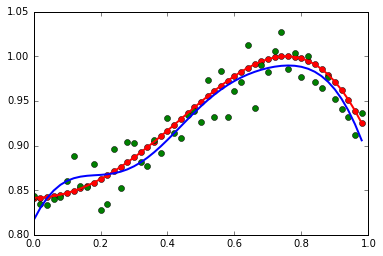

In [409]:
w = calculate_w(gauss_y, phi, M=5, alpha=0.0001, beta = 0.2)
y_est = calculate_y(x, w, M=5)
plot_full_bayesian(x, y, gauss_y, y_est)

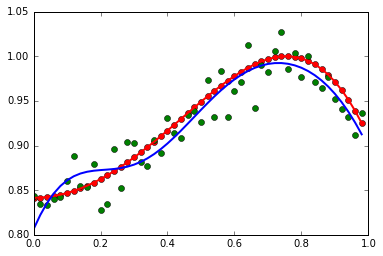

In [410]:
phi = basis_function(x, "gaussian", M=50)
w = calculate_w(gauss_y, phi, M=50, alpha=0.0001, beta = 0.01)
y_est = calculate_y(x, w, M=50)
plot_full_bayesian(x, y, gauss_y, y_est)

# Part 2: Bayesian Sequential Learning

## 1. Generate 50 2D-data points using the following function: y = sin(x^2 + 1)

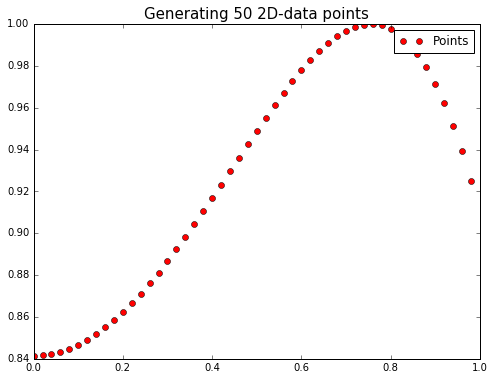

In [411]:
x = np.arange(0, 1, 0.02)
def f(x):
    return np.sin(x**2 + 1)
y = f(x)

# Plotting the data
def plot_data(x, y):
    setup_plot("Generating 50 2D-data points")
    plt.plot(x, y, "ro", label = "Points")
    plt.legend()
    plt.show()
    
plot_data(x, y)

## 2. Add Gaussian random noise to the data

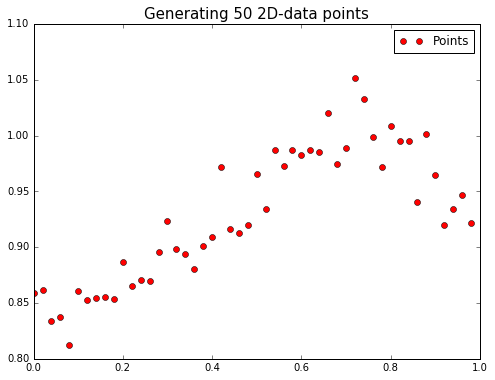

In [412]:
def add_noise(y):
    noise = np.random.normal(0, 0.02, 50)
    return y + noise

gauss_y = add_noise(y)
plot_data(x, gauss_y)


## 3. Fit the generated noisy data sequentially (5 data for each sequence).

In [435]:
""" Initializing the data """
x = np.arange(0, 1, 0.02)

# returns a list of first element s_init and second element its inverse
def calculate_s_init(phi, M=5, alpha=0.0001, beta=0.2):
    alpha_I = np.identity(M) * alpha
    beta_phi_t_phi = np.dot(beta,(phi.transpose().dot(phi)))
    s_init_inv = np.add(alpha_I, beta_phi_t_phi)
    s_init = pinv(s_init_inv)
    return s_init

def fit_data(x, start, M=5, alpha=0.0001, beta=0.2):
    end = start+5
    x_init = x[start:end]
    gauss_y = add_noise(y)
    
    phi = basis_function(x_init, "gaussian")
    s_init = calculate_s_init(phi)
    #print("s_init: %s" % s_init[0])
    m_init = np.multiply(beta, s_init.dot(phi.transpose().dot(gauss_y[start:end])))
    #print("m_init: %s" % m_init)
    y_est = []
    y_est.append(calculate_y(x, m_init, M))
    
    """ 
    calculate M_n and S_n based on the previous values and save the result in a list
    Remember! s[1] is the inverse
    
    """
    for i in range(1, 10):
        start += 5
        end = start + 5
        
        """saving the previous values of s and m"""
        phi = basis_function(x[start:end], "gaussian")
        s_prev = s_init
        m_prev = m_init
        """updating the values of s and m"""
        s_init = pinv(s_prev) + np.dot(beta, phi.transpose().dot(phi))
        m_init = pinv(s_init).dot(pinv(s_prev).dot(m_prev) + np.dot(beta, phi.transpose().dot(gauss_y[start:end])))
        y_est.append(calculate_y(x, m_init, M))
        #print("s_init: %s" % s_init)
    
    return y_est

def plot_sequential_data(x, y, gauss_y, y_est):
    plt.plot(x, y, "ro", label = "Points")
    plt.plot(x, gauss_y, "go", label = "Gaussian Noise")
    org_line = plt.plot(x,y,label = "Original Curve")
    plt.setp(org_line, color='r', linewidth=2.0)
    est_line = plt.plot(x, y_est, label = "Estimated Curve")
    plt.setp(est_line, color='b', linewidth=2.0)

y_est = fit_data(x, 0)

## 4. Show your best result for each sequence.

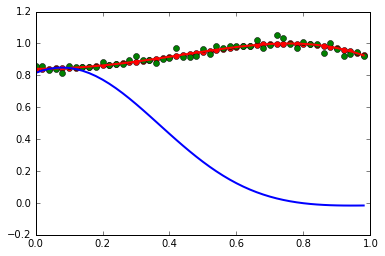

In [436]:
plot_sequential_data(x, y, gauss_y, y_est[0])

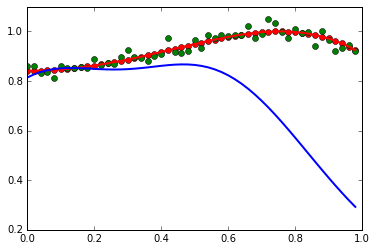

In [437]:
plot_sequential_data(x, y, gauss_y, y_est[1])

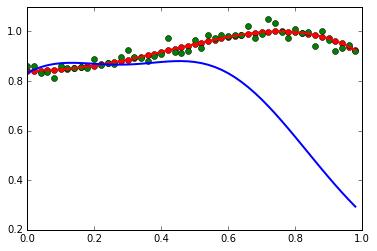

In [438]:
plot_sequential_data(x, y, gauss_y, y_est[2])

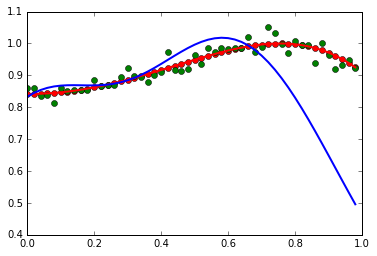

In [439]:
plot_sequential_data(x, y, gauss_y, y_est[3])

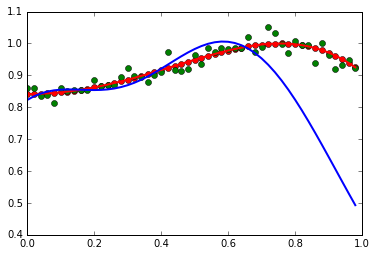

In [440]:
plot_sequential_data(x, y, gauss_y, y_est[4])

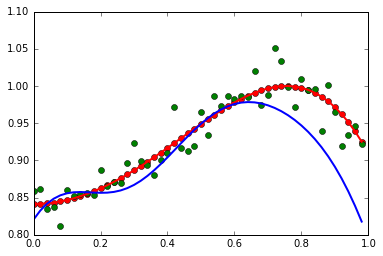

In [441]:
plot_sequential_data(x, y, gauss_y, y_est[5])

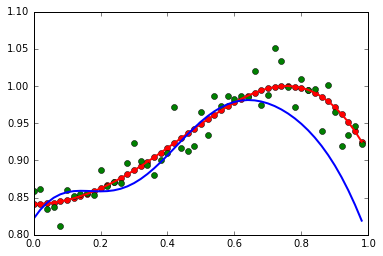

In [442]:
plot_sequential_data(x, y, gauss_y, y_est[6])

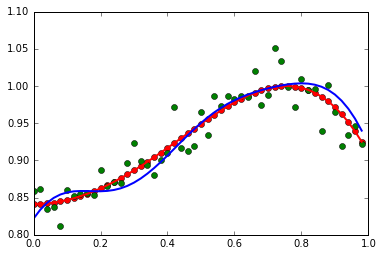

In [443]:
plot_sequential_data(x, y, gauss_y, y_est[7])

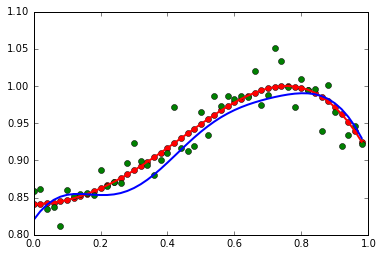

In [444]:
plot_sequential_data(x, y, gauss_y, y_est[8])

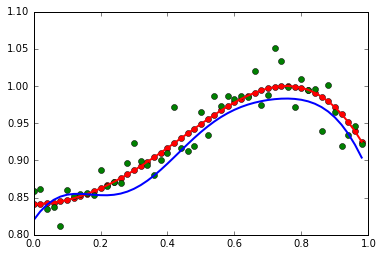

In [445]:
plot_sequential_data(x, y, gauss_y, y_est[9])

## 5. Show the result of using the non-sequential full Bayesian inference, and check if it is the same as the final result of the Bayesian sequential learning. 

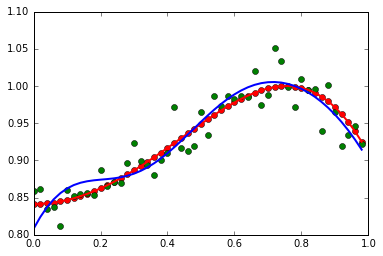

In [424]:
phi = basis_function(x, "gaussian", M=50)
w = calculate_w(gauss_y, phi, M=50, alpha=0.0001, beta = 0.01)
y_est = calculate_y(x, w, M=50)
plot_full_bayesian(x, y, gauss_y, y_est)